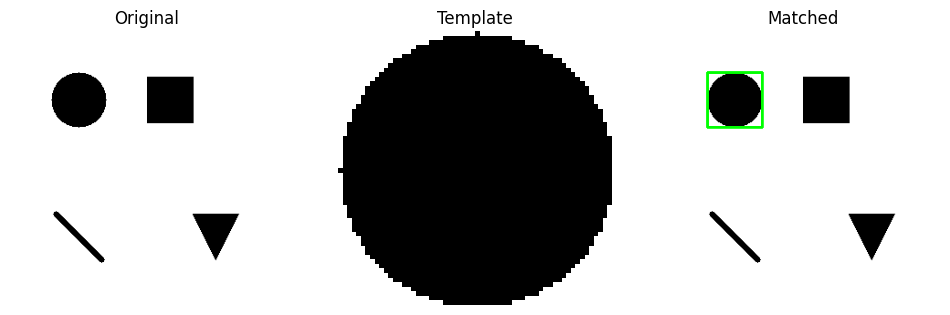

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image and template (both in grayscale)
img = cv.imread('shapes.png', 0)
template = cv.imread('circle_template.png', 0)

# Match template
result = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv.minMaxLoc(result)

# Draw rectangle
h, w = template.shape
matched_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.rectangle(matched_img, max_loc, (max_loc[0] + w, max_loc[1] + h), (0, 255, 0), 2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(template, cmap='gray'), plt.title("Template"), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(matched_img), plt.title("Matched"), plt.axis('off')
plt.show()

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def generate_shape_dataset(num=100):
    data = []
    labels = []
    for _ in range(num):
        shape_type = np.random.choice(['circle', 'square', 'triangle'])
        img = np.zeros((64, 64), dtype=np.uint8)
        if shape_type == 'circle':
            cv.circle(img, (32, 32), 20, 255, -1)
            labels.append(0)
        elif shape_type == 'square':
            cv.rectangle(img, (20, 20), (44, 44), 255, -1)
            labels.append(1)
        elif shape_type == 'triangle':
            pts = np.array([[32, 10], [10, 54], [54, 54]], np.int32)
            cv.fillPoly(img, [pts], 255)
            labels.append(2)
        data.append(img.flatten() / 255.0)
    return np.array(data), np.array(labels)

X, y = generate_shape_dataset(300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ANN Classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [36]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8936 - loss: 0.3510 - val_accuracy: 0.9843 - val_loss: 0.0555
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9823 - loss: 0.0557 - val_accuracy: 0.9877 - val_loss: 0.0422
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9882 - val_loss: 0.0418
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9915 - val_loss: 0.0330
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9949 - loss: 0.0163 - val_accuracy: 0.9893 - val_loss: 0.0394
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0442
Test Accuracy: 98.96%
